In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical


import matplotlib.pyplot as plt
from PIL import Image
import glob

# CNN Memory limits
physical_devices = tf.config.list_physical_devices('GPU') 
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

plt.rcParams['figure.figsize'] = [5,5]

import warnings
warnings.filterwarnings('ignore')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<h3>Cocker Spaniel Preprocessing</h3>

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B51522E0>


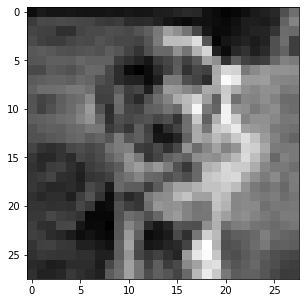

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B316BC10>


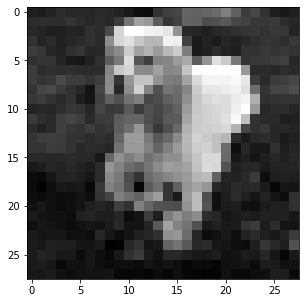

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B514E8E0>


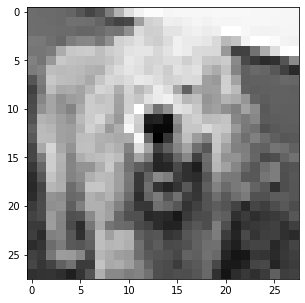

In [4]:
image_list = []

w = 28
h = 28


for filename in glob.glob('cocker_Spaniel/*.jpg'):
    im = Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    image_list.append(im)
    
for item in image_list[:3]:
    print(item)
    plt.imshow(item, cmap="gray")
    plt.show()
    
for index, image in enumerate(image_list):
    image.save("pre/cockerSpaniel/image-"+str(index)+".jpg")

<h3>Collie Preprocessing</h3>

<PIL.Image.Image image mode=L size=28x28 at 0x1A7BDB3BEE0>


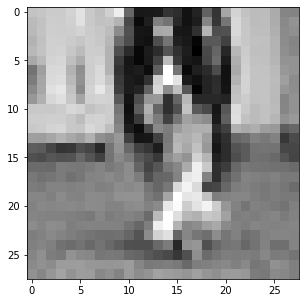

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B320C8B0>


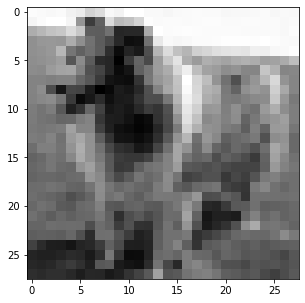

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B322D3A0>


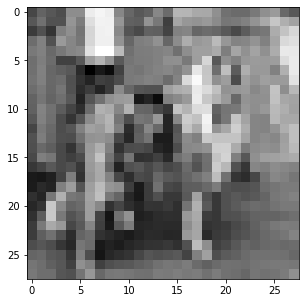

In [5]:
image_list = []

w = 28
h = 28


for filename in glob.glob('collie/*.jpg'):
    im = Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    image_list.append(im)
    
for item in image_list[:3]:
    print(item)
    plt.imshow(item, cmap="gray")
    plt.show()
    
for index, image in enumerate(image_list):
    image.save("pre/collie/image-"+str(index)+".jpg")

<h3>English Springer Preprocessing</h3>

<PIL.Image.Image image mode=L size=28x28 at 0x1A7C4981640>


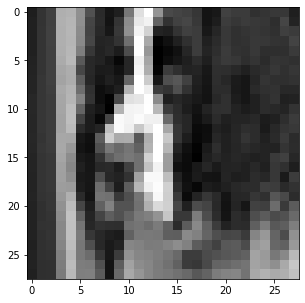

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B3227B50>


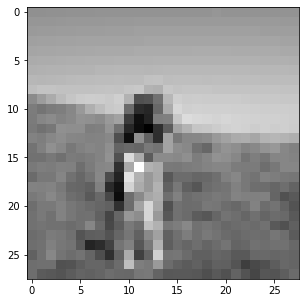

<PIL.Image.Image image mode=L size=28x28 at 0x1A7BDB65280>


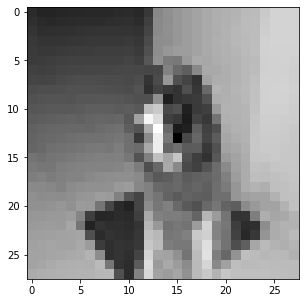

In [6]:
image_list = []

w = 28
h = 28


for filename in glob.glob('English_springer/*.jpg'):
    im = Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    image_list.append(im)
    
for item in image_list[:3]:
    print(item)
    plt.imshow(item, cmap="gray")
    plt.show()
    
for index, image in enumerate(image_list):
    image.save("pre/englishSpringer/image-"+str(index)+".jpg")

<h3>German Shepherd Preprocessing</h3>

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B322D2E0>


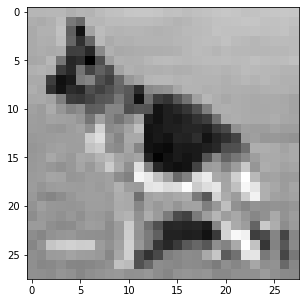

<PIL.Image.Image image mode=L size=28x28 at 0x1A7BDB3BDF0>


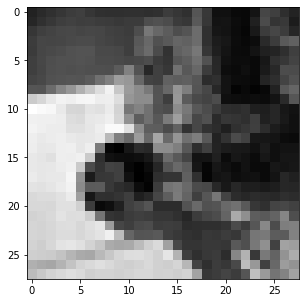

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B322D430>


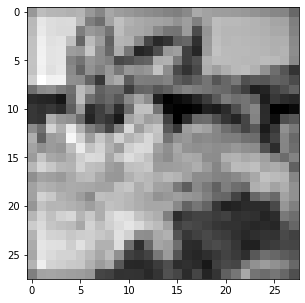

In [7]:
image_list = []

w = 28
h = 28


for filename in glob.glob('German_shepherd/*.jpg'):
    im = Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    image_list.append(im)
    
for item in image_list[:3]:
    print(item)
    plt.imshow(item, cmap="gray")
    plt.show()
    
for index, image in enumerate(image_list):
    image.save("pre/germanShepherd/image-"+str(index)+".jpg")

<h3>Golden Retriever Preprocessing</h3>

<PIL.Image.Image image mode=L size=28x28 at 0x1A7B5F2BB80>


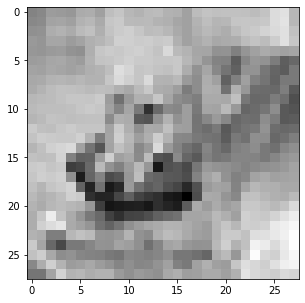

<PIL.Image.Image image mode=L size=28x28 at 0x1A7C4CA2EE0>


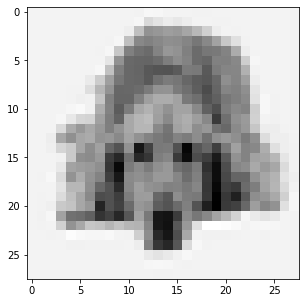

<PIL.Image.Image image mode=L size=28x28 at 0x1A7C504BA30>


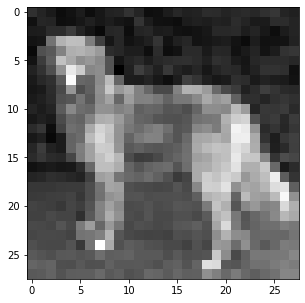

In [8]:
image_list = []

w = 28
h = 28


for filename in glob.glob('golden_retriever/*.jpg'):
    im = Image.open(filename).convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    image_list.append(im)
    
for item in image_list[:3]:
    print(item)
    plt.imshow(item, cmap="gray")
    plt.show()
    
for index, image in enumerate(image_list):
    image.save("pre/goldenRetriever/image-"+str(index)+".jpg")

<h3>Import the images</h3>

In [9]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Load data
X =[]
Y =[]

for filename in glob.glob('pre/cockerSpaniel/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(0)
    
for filename in glob.glob('pre/collie/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(1)

for filename in glob.glob('pre/englishSpringer/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(2) 
    
for filename in glob.glob('pre/germanShepherd/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(3)

for filename in glob.glob('pre/goldenRetriever/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(4)

<h3>Process the images for the DANN</h3>

In [10]:
# Convert to NP array
X = np.array(X)

#Get number of Pixels
num_pixels = X.shape[1] * X.shape[2]   # 28 * 28 = 784

# Flatten
X = X.reshape(X.shape[0], num_pixels).astype('float32')

# Normalize the data
X = X /255

# Convert to NP array
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]



Y = to_categorical(Y)
num_classes = Y.shape[1]

<h3>Model 1</h3>

Epoch 1/20
9/9 [==============================] - 5s 31ms/step - loss: 2.1791 - acc: 0.2244 - val_loss: 1.7678 - val_acc: 0.2305
Epoch 2/20
9/9 [==============================] - 0s 10ms/step - loss: 1.6125 - acc: 0.2592 - val_loss: 1.7173 - val_acc: 0.2500
Epoch 3/20
9/9 [==============================] - 0s 18ms/step - loss: 1.5471 - acc: 0.2824 - val_loss: 1.5516 - val_acc: 0.2656
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 1.5333 - acc: 0.3095 - val_loss: 1.6359 - val_acc: 0.2500
Epoch 5/20
9/9 [==============================] - 0s 10ms/step - loss: 1.5331 - acc: 0.3250 - val_loss: 1.7015 - val_acc: 0.2812
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 1.4791 - acc: 0.3520 - val_loss: 1.5010 - val_acc: 0.3047
Epoch 7/20
9/9 [==============================] - 0s 8ms/step - loss: 1.4288 - acc: 0.3636 - val_loss: 1.5379 - val_acc: 0.2734
Epoch 8/20
9/9 [==============================] - 0s 7ms/step - loss: 1.3850 - acc: 0.4120 - val_los

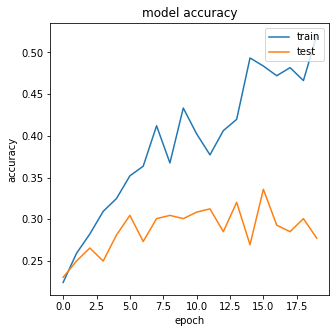

In [11]:
model = Sequential()
model.add(Dense(784, input_dim=num_pixels,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=64, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Model 2</h3>

Epoch 1/50
4/4 [==============================] - 1s 71ms/step - loss: 1.6349 - acc: 0.1934 - val_loss: 1.6023 - val_acc: 0.2109
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 1.5932 - acc: 0.2398 - val_loss: 1.6013 - val_acc: 0.2070
Epoch 3/50
4/4 [==============================] - 0s 26ms/step - loss: 1.5730 - acc: 0.2766 - val_loss: 1.6026 - val_acc: 0.2109
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 1.5554 - acc: 0.2824 - val_loss: 1.6311 - val_acc: 0.2188
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 1.5727 - acc: 0.2689 - val_loss: 1.6314 - val_acc: 0.2344
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 1.5507 - acc: 0.2611 - val_loss: 1.5896 - val_acc: 0.2305
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 1.5187 - acc: 0.2863 - val_loss: 1.5925 - val_acc: 0.2539
Epoch 8/50
4/4 [==============================] - 0s 17ms/step - loss: 1.5089 - acc: 0.2843 - val

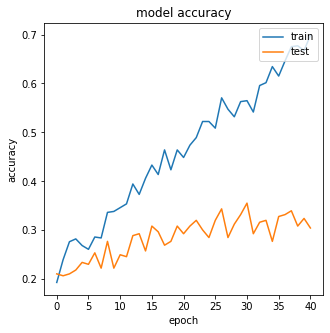

In [17]:
model = Sequential()
model.add(Dense(96, input_dim=num_pixels,activation='relu'))
model.add(Dense(192, input_dim=num_pixels,activation='relu'))
model.add(Dense(96, input_dim=num_pixels,activation='relu'))
model.add(Dense(16, input_dim=num_pixels,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=150, verbose=1, callbacks=[callback])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Model 3</h3>

Epoch 1/100
4/4 [==============================] - 1s 68ms/step - loss: 1.6406 - acc: 0.1876 - val_loss: 1.6142 - val_acc: 0.2070
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.6048 - acc: 0.2360 - val_loss: 1.6016 - val_acc: 0.2109
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 1.6030 - acc: 0.2282 - val_loss: 1.6135 - val_acc: 0.2070
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 1.6070 - acc: 0.2263 - val_loss: 1.6062 - val_acc: 0.1953
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1.5992 - acc: 0.2186 - val_loss: 1.5894 - val_acc: 0.2578
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 1.6035 - acc: 0.2224 - val_loss: 1.5837 - val_acc: 0.2539
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 1.5856 - acc: 0.2495 - val_loss: 1.5875 - val_acc: 0.2617
Epoch 8/100
4/4 [==============================] - 0s 20ms/step - loss: 1.5802 - acc: 0.26

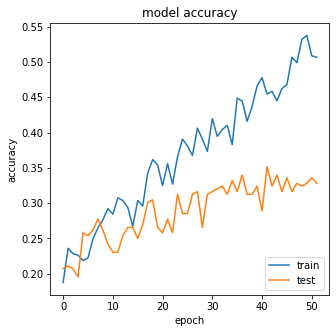

In [21]:
model = Sequential()
model.add(Dense(96, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(192, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(96, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, input_dim=num_pixels,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=150, verbose=1, callbacks=[callback])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 4</h3>

Epoch 1/100
4/4 [==============================] - 1s 62ms/step - loss: 1.6711 - acc: 0.2012 - val_loss: 1.6044 - val_acc: 0.2422
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 1.6376 - acc: 0.2553 - val_loss: 1.6093 - val_acc: 0.2227
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 1.6207 - acc: 0.2263 - val_loss: 1.6095 - val_acc: 0.2227
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 1.6058 - acc: 0.1992 - val_loss: 1.6112 - val_acc: 0.2148
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 1.6269 - acc: 0.1992 - val_loss: 1.6103 - val_acc: 0.1992
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 1.6100 - acc: 0.2070 - val_loss: 1.6107 - val_acc: 0.2031
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 1.6102 - acc: 0.2282 - val_loss: 1.6105 - val_acc: 0.1992
Epoch 8/100
4/4 [==============================] - 0s 17ms/step - loss: 1.6049 - acc: 0.23

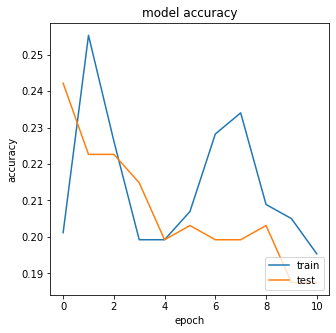

In [36]:
model = Sequential()
model.add(Dense(50, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, input_dim=num_pixels,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=150, verbose=1, callbacks=[callback])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 5</h3>

Epoch 1/100
6/6 [==============================] - 1s 54ms/step - loss: 1.6266 - acc: 0.1915 - val_loss: 1.6115 - val_acc: 0.2539
Epoch 2/100
6/6 [==============================] - 0s 29ms/step - loss: 1.6053 - acc: 0.2128 - val_loss: 1.6048 - val_acc: 0.2266
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 1.6043 - acc: 0.2108 - val_loss: 1.6775 - val_acc: 0.1875
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 1.6000 - acc: 0.2437 - val_loss: 1.5925 - val_acc: 0.2617
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 1.5836 - acc: 0.2631 - val_loss: 1.6038 - val_acc: 0.2383
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 1.5892 - acc: 0.2669 - val_loss: 1.6019 - val_acc: 0.2031
Epoch 7/100
6/6 [==============================] - 0s 21ms/step - loss: 1.6187 - acc: 0.2360 - val_loss: 1.6130 - val_acc: 0.1992
Epoch 8/100
6/6 [==============================] - 0s 42ms/step - loss: 1.6236 - acc: 0.20

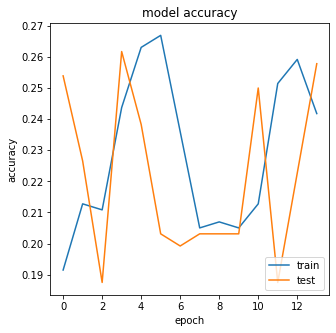

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2000, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, input_dim=num_pixels,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=100, verbose=1, callbacks=[callback])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Model 6</h3>

Epoch 1/100
6/6 [==============================] - 1s 43ms/step - loss: 1.6131 - acc: 0.1992 - val_loss: 1.6100 - val_acc: 0.1914
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 1.6009 - acc: 0.2515 - val_loss: 1.5904 - val_acc: 0.2422
Epoch 3/100
6/6 [==============================] - 0s 22ms/step - loss: 1.6076 - acc: 0.2128 - val_loss: 1.5999 - val_acc: 0.2070
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 1.5844 - acc: 0.2592 - val_loss: 1.6118 - val_acc: 0.2305
Epoch 5/100
6/6 [==============================] - 0s 20ms/step - loss: 1.5876 - acc: 0.2824 - val_loss: 1.5785 - val_acc: 0.2578
Epoch 6/100
6/6 [==============================] - 0s 21ms/step - loss: 1.5621 - acc: 0.2940 - val_loss: 1.5989 - val_acc: 0.2344
Epoch 7/100
6/6 [==============================] - 0s 22ms/step - loss: 1.5537 - acc: 0.2843 - val_loss: 1.5764 - val_acc: 0.2539
Epoch 8/100
6/6 [==============================] - 0s 21ms/step - loss: 1.5431 - acc: 0.29

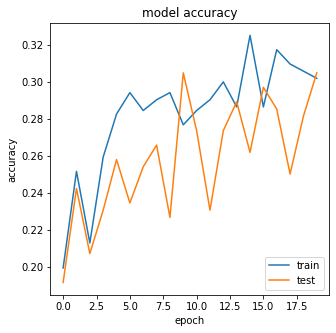

In [48]:
model = Sequential()
model.add(Dense(50, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500, input_dim=num_pixels,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, input_dim=num_pixels,activation='relu'))
model.add(Dense(10, input_dim=num_pixels,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=100, verbose=1, callbacks=[callback])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Predicting unseen data</h3>

In [51]:
# or Scaled
w = 28
h = 28
X = []
Y = []
image_list = []

for filename in glob.glob('unseen/cockerSpaniel/*'):
    #Convert to greyscale
    img=Image.open(filename).convert('L')
    img = img.resize((w,h))
    arr = np.array(img)
    X.append(arr)
    Y.append(0)

for filename in glob.glob('unseen/collie/*'):
#     Convert to greyscale
    img=Image.open(filename).convert('L')
    img = img.resize((w,h))
    arr = np.array(img)
    X.append(arr)
    Y.append(1)

for filename in glob.glob('unseen/englishSpringer/*'):
    #Convert to greyscale
    img=Image.open(filename).convert('L')
    img = img.resize((w,h))
    arr = np.array(img)
    X.append(arr)
    Y.append(2)

for filename in glob.glob('unseen/germanShepherd/*'):
#     Convert to greyscale
    img=Image.open(filename).convert('L')
    img = img.resize((w,h))
    arr = np.array(img)
    X.append(arr)
    Y.append(3)

for filename in glob.glob('unseen/goldenRetriever/*'):
    #Convert to greyscale
    img=Image.open(filename).convert('L')
    img = img.resize((w,h))
    arr = np.array(img)
    X.append(arr)
    Y.append(4)

# Convert to NP array
X = np.array(X)

#Get number of Pixels
num_pixels = X.shape[1] * X.shape[2]   # 28 * 28 = 784

# Flatten
X = X.reshape(X.shape[0], num_pixels).astype('float32')

# Normalize the data
X = X /255

# Convert to NP array
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]



Y = to_categorical(Y)
num_classes = Y.shape[1]

# modelNew.evaluate(X, Y, verbose=1)
# modelNew.predict(X)
model.evaluate(X, Y, verbose=1)
print(Y)
model.predict(X)


1/1 [==============================] - 0s 33ms/step - loss: 1.4654 - acc: 0.3000
[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


array([[0.15144077, 0.271962  , 0.21419856, 0.18584704, 0.1765516 ],
       [0.136506  , 0.3070451 , 0.20705888, 0.19551179, 0.15387826],
       [0.16279194, 0.24461304, 0.2165335 , 0.19711761, 0.17894389],
       [0.13179353, 0.30841362, 0.21103257, 0.25333038, 0.09542986],
       [0.16182758, 0.25639573, 0.21055691, 0.23744552, 0.13377428],
       [0.11830564, 0.31382447, 0.2514889 , 0.1860519 , 0.13032912],
       [0.17425446, 0.22963579, 0.20386371, 0.18726808, 0.2049779 ],
       [0.26382893, 0.16562398, 0.15976734, 0.22310331, 0.18767649],
       [0.39964712, 0.10953843, 0.09741964, 0.21795003, 0.17544478],
       [0.23693995, 0.18180996, 0.17638548, 0.23278627, 0.17207834]],
      dtype=float32)